<a href="https://colab.research.google.com/github/HHansi/Machine-Learning-CPD-Course/blob/activities/Activities/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem

**What categories can be recognised from electricity charges?**

1.   Load tariff.csv into a DataFrame.
2.   Clean and visualise data using appropriate techniques.
3.   Recognise optimum clusters of electricity charges using K-means algorithm.
4.   Analyse the properties of each cluster and name the clusters.
5.   Report your findings.



## Description of the Data Set
tariff.csv data set consists of 6 columns describing the energy consumption by different houses. 


*   homeid - unique id assigned to each home
*   notification_date - date of notification
*   provenancedetail - provenance tag/name
*   energytype	- type of energy
*   daily_standing_charge_pence
*   unit_charge_pence_per_kwh


(This data set is taken from [IDEAL Household Energy Dataset](https://datashare.ed.ac.uk/handle/10283/3647).)

# Libraries

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load Data

In [ ]:
# Load the data set
df = pd.read_csv("https://raw.githubusercontent.com/HHansi/Machine-Learning-CPD-Course/main/Data/tariff.csv")
df.head(5)

,homeid,notification_date,provenancedetail,energytype,daily_standing_charge_pence,unit_charge_pence_per_kwh
0,167,8/25/2016,primary_facetoface_initial,electricity,23.02,NaN
1,62,8/26/2016,primary_facetoface_initial,electricity,31.31,NaN
2,62,8/26/2016,primary_facetoface_initial,gas,24.74,NaN
3,61,10/6/2016,primary_facetoface_initial,electricity,0.33,0.12
4,61,10/6/2016,primary_facetoface_initial,gas,0.30,0.33


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   homeid                       565 non-null    int64  
 1   notification_date            565 non-null    object 
 2   provenancedetail             565 non-null    object 
 3   energytype                   565 non-null    object 
 4   daily_standing_charge_pence  559 non-null    float64
 5   unit_charge_pence_per_kwh    545 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 26.6+ KB


In [ ]:
df.shape

(565, 6)

In [ ]:
# Find if the data set contains Null/NaN values
df.isna().sum()

homeid                          0
notification_date               0
provenancedetail                0
energytype                      0
daily_standing_charge_pence     6
unit_charge_pence_per_kwh      20
dtype: int64

# Data Cleaning

In [ ]:
# Select important columns
filtered_df = df[['homeid', 'energytype', 'daily_standing_charge_pence']]
filtered_df.head(5)

,homeid,energytype,daily_standing_charge_pence
0,167,electricity,23.02
1,62,electricity,31.31
2,62,gas,24.74
3,61,electricity,0.33
4,61,gas,0.30


In [ ]:
# filter rows of energytype = electricity
df_electricity = filtered_df.loc[df['energytype'] == 'electricity']
print(df_electricity.shape)
df_electricity.head(5)

(281, 3)


,homeid,energytype,daily_standing_charge_pence
0,167,electricity,23.02
1,62,electricity,31.31
3,61,electricity,0.33
5,64,electricity,26.02
6,64,electricity,26.00


In [ ]:
# remove rows and columns with Null/NaN values.
cleaned_df_electricity = df_electricity.dropna()
cleaned_df_electricity.shape

(278, 3)

In [ ]:
# remove zeros
cleaned_df_electricity = cleaned_df_electricity.loc[df['daily_standing_charge_pence'] != 0]
cleaned_df_electricity.shape

(261, 3)

In [ ]:
cleaned_df_electricity.describe()

,homeid,daily_standing_charge_pence
count,261.000000,261.000000
mean,181.371648,21.765556
std,74.450989,7.596207
min,61.000000,0.130000
25%,114.000000,16.000000
50%,177.000000,21.000000
75%,246.000000,26.000000
max,335.000000,58.000000


# EDA

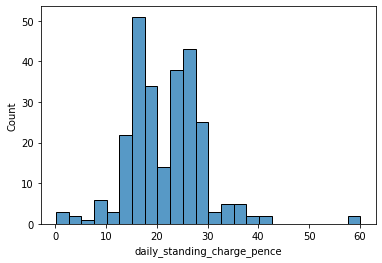

In [ ]:
sns.histplot(data=cleaned_df_electricity, x='daily_standing_charge_pence', binwidth=2.5)

plt.show()

# K-means clustering

In [ ]:
# To train K-means model, as the input, we need provide X: array-like/sparse matrix of shape (n_samples, n_features).
x = np.array(cleaned_df_electricity['daily_standing_charge_pence']).reshape(-1,1)
x.shape

(261, 1)

## Elbow Method

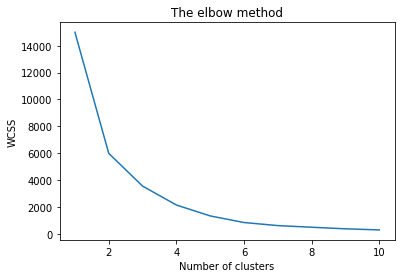

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=1234)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)  # get within cluster sum of squares (squared distances)
    
# Plot the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

According to Elbow method, optimal k=5.

## Optimal Clusters

predicted clusters:
 [2 0 3 2 2 1 3 1 1 1 2 2 2 2 3 1 1 1 1 1 1 3 1 1 1 2 2 2 2 2 2 0 0 1 1 2 1
 1 1 1 3 1 3 1 1 1 2 2 2 2 1 2 1 1 1 1 1 1 1 1 3 3 1 2 2 2 3 2 2 2 2 2 2 1
 1 1 1 3 1 2 1 3 2 1 1 2 2 2 2 2 1 1 2 1 1 2 1 1 2 1 0 0 1 0 0 2 2 1 1 4 4
 1 1 2 1 1 2 2 2 2 2 1 1 1 1 1 1 1 2 1 2 0 0 1 1 2 2 0 1 2 2 2 0 2 1 2 2 2
 1 1 2 1 2 1 2 2 1 1 1 1 1 2 2 1 3 2 1 2 2 2 2 1 3 2 2 0 1 1 1 1 1 1 1 2 1
 1 3 2 2 1 1 2 2 2 1 1 1 1 2 2 0 0 1 2 2 2 2 1 2 1 2 2 1 1 2 1 2 2 1 2 2 2
 1 1 1 2 2 1 2 2 2 1 1 2 1 2 1 1 2 3 2 2 2 0 2 2 2 2 1 1 1 2 1 1 2 1 0 2 1
 2 1]

cluster centroids:
 [[35.938125  ]
 [17.16771186]
 [26.01645455]
 [ 6.81333333]
 [58.        ]]



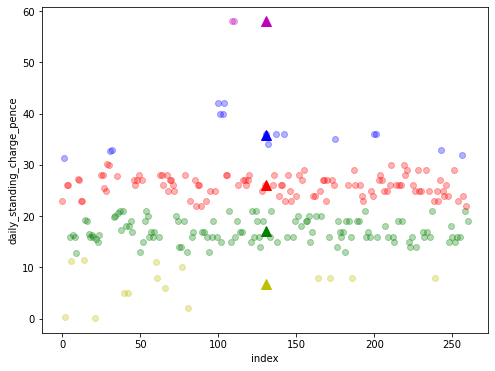

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=1234)  # create an instance of the class KMeans, giving number of clusters and random state as parameters
kmeans.fit(x)  # train model 
 
# predict assigned cluster labels
labels = kmeans.predict(x)
print(f'predicted clusters:\n {labels}\n')

# get cluster centroids
centroids = kmeans.cluster_centers_
print(f'cluster centroids:\n {centroids}\n')

fig = plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'y', 'm']

# plot data points
for i in range(len(x)):
  plt.plot(i, x[i], color=colors[labels[i]], marker='o', alpha=0.3)

# plot centroids
for n, y in enumerate(centroids):
  plt.plot(len(x)/2, y, marker='^', color=colors[n], ms=10)

plt.xlabel("index")
plt.ylabel("daily_standing_charge_pence")
  
plt.show()

In [ ]:
# replace cluster IDs by names
conditions = [labels==0, labels==1, labels==2, labels==3, labels==4]
choice = ['high', 'low', 'mid', 'very low', 'very high']

label_names = np.select(conditions, choice)
print(label_names)

['mid' 'high' 'very low' 'mid' 'mid' 'low' 'very low' 'low' 'low' 'low'
 'mid' 'mid' 'mid' 'mid' 'very low' 'low' 'low' 'low' 'low' 'low' 'low'
 'very low' 'low' 'low' 'low' 'mid' 'mid' 'mid' 'mid' 'mid' 'mid' 'high'
 'high' 'low' 'low' 'mid' 'low' 'low' 'low' 'low' 'very low' 'low'
 'very low' 'low' 'low' 'low' 'mid' 'mid' 'mid' 'mid' 'low' 'mid' 'low'
 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'very low' 'very low' 'low'
 'mid' 'mid' 'mid' 'very low' 'mid' 'mid' 'mid' 'mid' 'mid' 'mid' 'low'
 'low' 'low' 'low' 'very low' 'low' 'mid' 'low' 'very low' 'mid' 'low'
 'low' 'mid' 'mid' 'mid' 'mid' 'mid' 'low' 'low' 'mid' 'low' 'low' 'mid'
 'low' 'low' 'mid' 'low' 'high' 'high' 'low' 'high' 'high' 'mid' 'mid'
 'low' 'low' 'very high' 'very high' 'low' 'low' 'mid' 'low' 'low' 'mid'
 'mid' 'mid' 'mid' 'mid' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'mid'
 'low' 'mid' 'high' 'high' 'low' 'low' 'mid' 'mid' 'high' 'low' 'mid'
 'mid' 'mid' 'high' 'mid' 'low' 'mid' 'mid' 'mid' 'low' 'low' 'mid' 'l

In [ ]:
# update DataFrame with clusters column
cleaned_df_electricity['clusters'] = label_names
cleaned_df_electricity.head(5)

,homeid,energytype,daily_standing_charge_pence,clusters
0,167,electricity,23.02,mid
1,62,electricity,31.31,high
3,61,electricity,0.33,very low
5,64,electricity,26.02,mid
6,64,electricity,26.00,mid


In [ ]:
# save updated DataFrame
cleaned_df_electricity.to_csv("/content/tariff_electricity_clusters.csv", index=False)